# Data Import

Creating link between data stored in /data directory for 2017 crime data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1J2IfYQQqOSiUq6HVYhihIF98t4Rze0J-"
# https://drive.google.com/file/d/1-lZoRBIMtCf934o1gZ3xtXi8gnWqp1Dn/view?usp=sharing
id2 = "1-lZoRBIMtCf934o1gZ3xtXi8gnWqp1Dn"
downloaded = drive.CreateFile({'id':id}) 
downloaded2 = drive.CreateFile({'id':id2})
downloaded.GetContentFile('crime_data_2017.csv')  
downloaded2.GetContentFile('crime_data_2018.csv')
df = pd.read_csv('crime_data_2017.csv')
df2 = pd.read_csv('crime_data_2018.csv')
print(df.shape)
print(df2.shape)
print(df.head())
print(df2.head())

frames = [df, df2]
df = pd.concat(frames)
print(df.shape)

print(df.head())
# Dataset is now stored in a Pandas Dataframe

# https://drive.google.com/file/d/10if-ll7uTVS4ax3WuJ0jaE8nv8fWAXl4/view?usp=sharing



(169702, 19)
(162203, 19)
   LURN_SAK           INCIDENT_DATE  ... LATITUDE PART_CATEGORY
0  18298148  08/13/2017 07:30:00 AM  ...   33.987             1
1  18149842  03/23/2017 12:52:30 AM  ...   34.144             1
2  18151414  03/24/2017 09:25:00 PM  ...   34.135             2
3  18390641  11/07/2017 08:30:00 PM  ...   33.849             1
4  18254825  06/30/2017 04:24:00 PM  ...   34.691             2

[5 rows x 19 columns]
   LURN_SAK           INCIDENT_DATE  ... LATITUDE PART_CATEGORY
0  18692378  09/09/2018 12:00:00 AM  ...   34.696             2
1  18691063  09/07/2018 03:17:00 AM  ...   34.394             1
2  18577911  05/13/2018 06:15:00 PM  ...   33.887             2
3  18714783  09/30/2018 04:00:00 AM  ...   34.140             1
4  18578181  05/14/2018 03:38:00 AM  ...   34.040             1

[5 rows x 19 columns]
(331905, 19)
   LURN_SAK           INCIDENT_DATE  ... LATITUDE PART_CATEGORY
0  18298148  08/13/2017 07:30:00 AM  ...   33.987             1
1  18149842  03/23/

In [ ]:
# import image file 
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/gdrive")
la_map = cv2.imread("/content/gdrive/MyDrive/CSCI 461/group project :)/data/map.png")
# cv2_imshow(la_map)

MessageError: ignored

# Data Exploration

In [ ]:
# print out category headers
for column in df.columns:
  print(column)

LURN_SAK
INCIDENT_DATE
INCIDENT_REPORTED_DATE
CATEGORY
STAT
STAT_DESC
ADDRESS
STREET
CITY
ZIP
INCIDENT_ID
REPORTING_DISTRICT
SEQ
GANG_RELATED
UNIT_ID
UNIT_NAME
LONGITUDE
LATITUDE
PART_CATEGORY


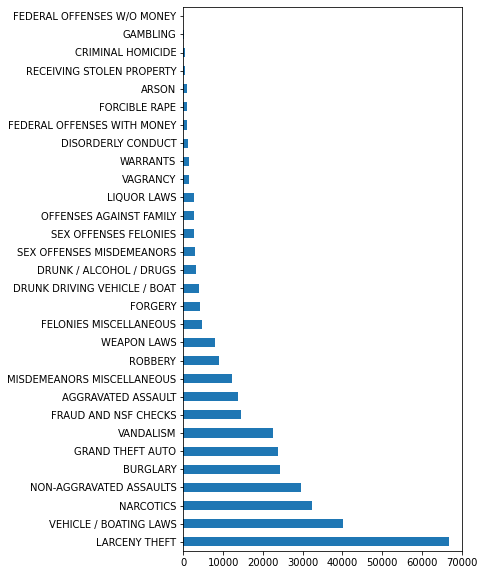

In [ ]:
# show list of crime categories & relative frequencies

category_counts = df["CATEGORY"].value_counts()
category_counts.plot(kind="barh", figsize=(5, 10))

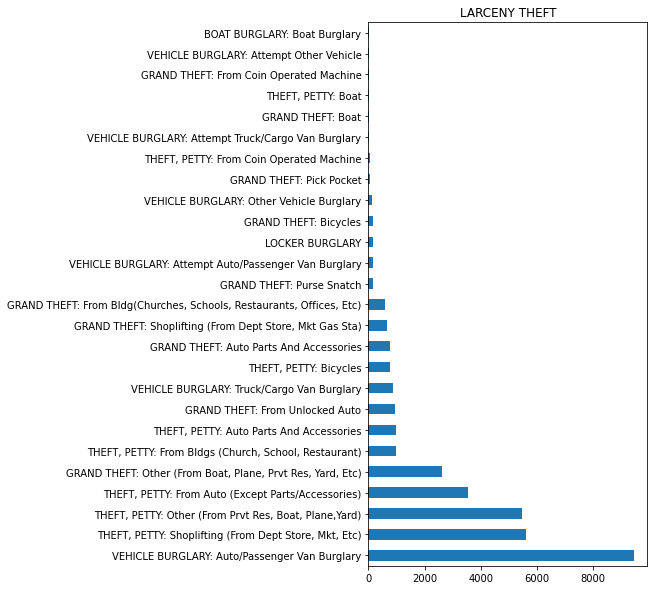

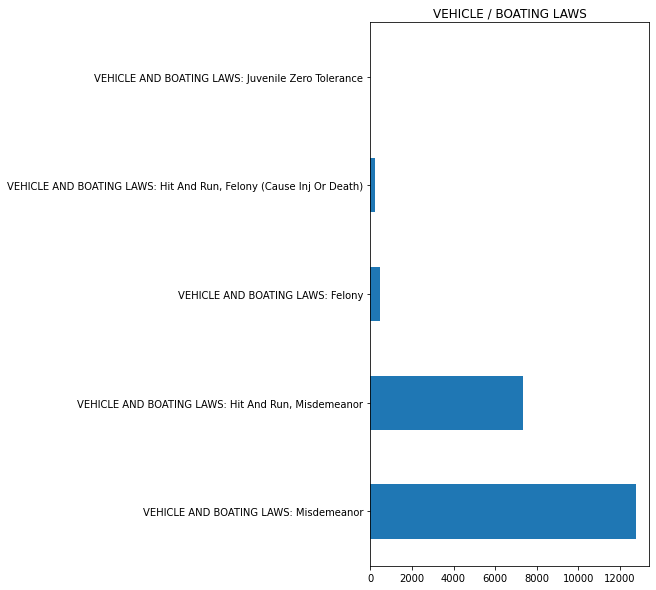

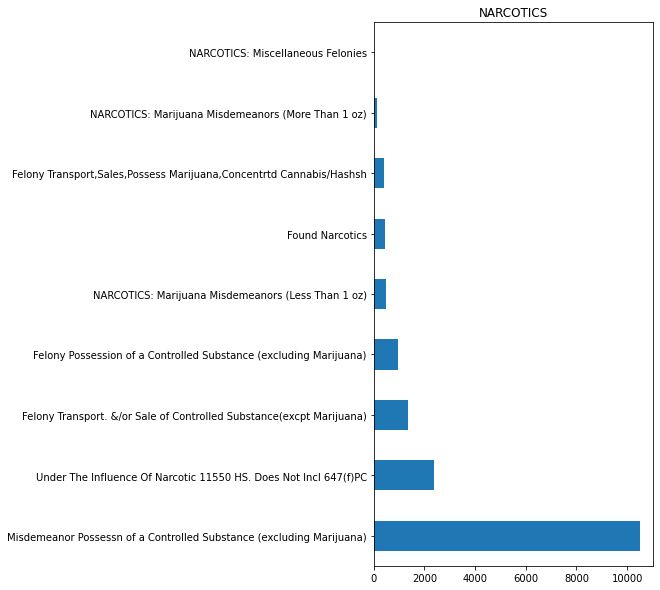

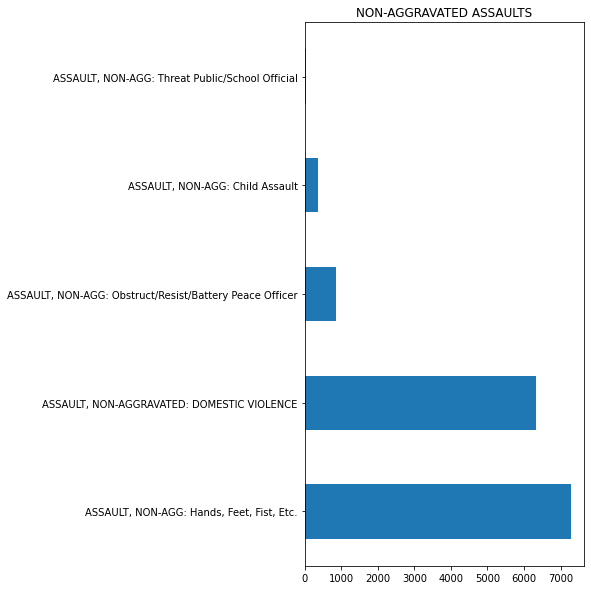

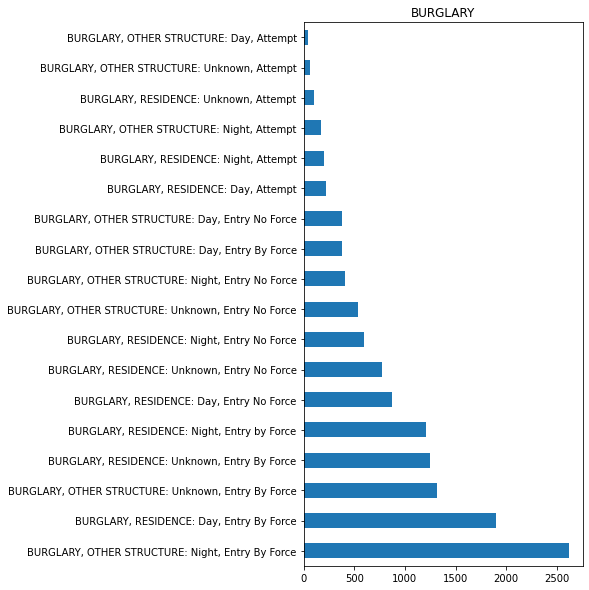

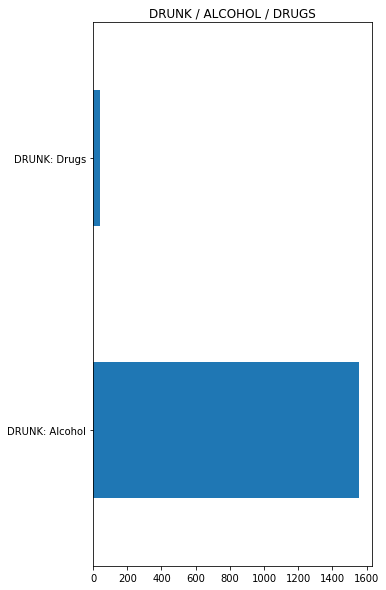

In [ ]:
# investigate narcotics, theft, boating laws further - see types of crimes and
# associated frequencies

category_list = [
        'LARCENY THEFT',
        'VEHICLE / BOATING LAWS',
        'NARCOTICS',
        'NON-AGGRAVATED ASSAULTS',
        'BURGLARY',
        'DRUNK / ALCOHOL / DRUGS'
]
for topic in category_list:
  df_theft = df[df['CATEGORY']==topic]
  larceny_theft_counts = df_theft['STAT_DESC'].value_counts()
  larceny_theft_counts.plot(kind="barh", figsize=(5, 10), title=topic)
  plt.show()



In [ ]:
df_latlong_filter = df[(df["LONGITUDE"] <= 180) & (df["LONGITUDE"] >= -180) & (df["LATITUDE"] <= 90) & (df["LATITUDE"] >= -90)]
longitude = df_latlong_filter["LONGITUDE"]
latitude = df_latlong_filter["LATITUDE"]
print(df_latlong_filter["LONGITUDE"].min())
print(df_latlong_filter["LONGITUDE"].max())
print(df_latlong_filter["LATITUDE"].min())
print(df_latlong_filter["LATITUDE"].max())

# min coords: (33.332, -118.934)
# max coords: (34.820, -117.641)

-118.934
-117.641
33.332
34.82


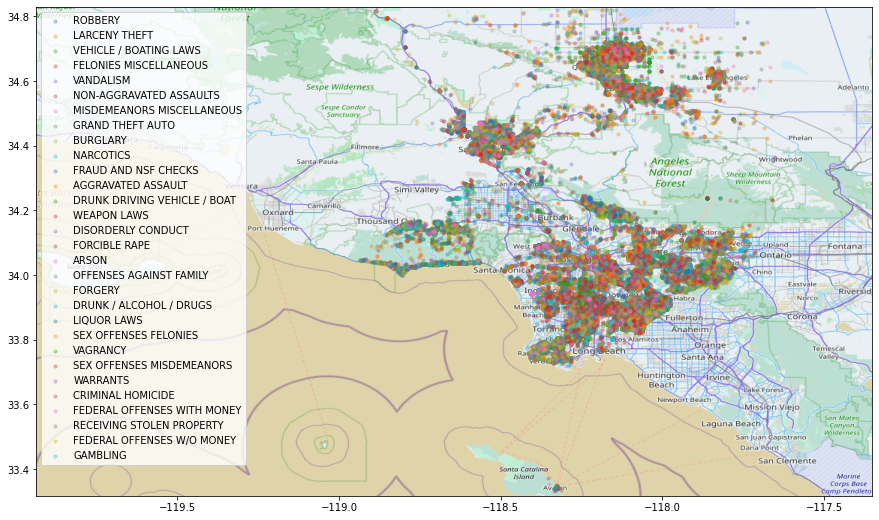

In [ ]:
# create point map for crime locations
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db


fig, ax = plt.subplots(figsize = (16,9))
categories = df["CATEGORY"].unique()
for category in categories:
  df_col = df[df["CATEGORY"] == category]
  df_long = df_col["LONGITUDE"]
  df_lat = df_col["LATITUDE"]
  plot = ax.scatter(df_long, df_lat, zorder=1, alpha= 0.3, s=10)
  plot.set_label(category)
min_lat = 33.317
max_lat = 34.830
min_long = -119.936
max_long = -117.352
BBox = (min_long, max_long,      
         min_lat, max_lat)
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)

ax.legend()

ax.imshow(la_map, zorder=0, extent = BBox, aspect='equal')


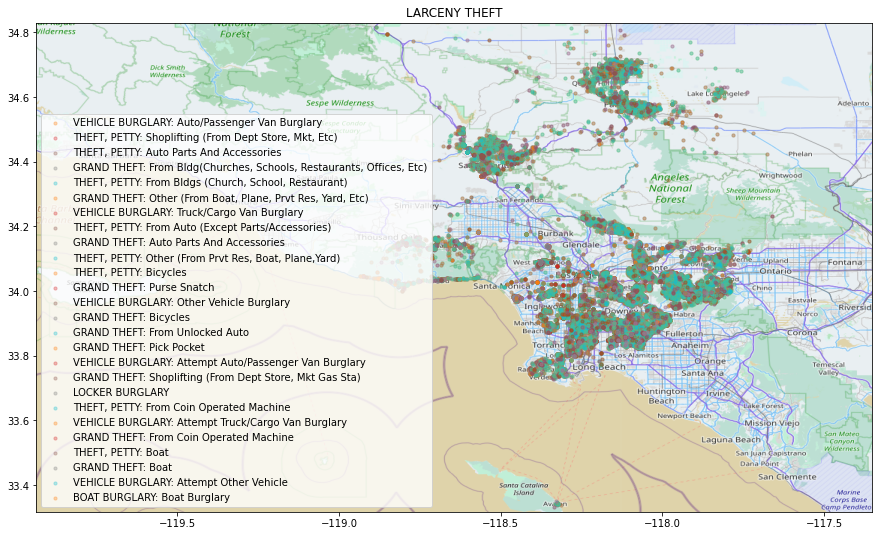

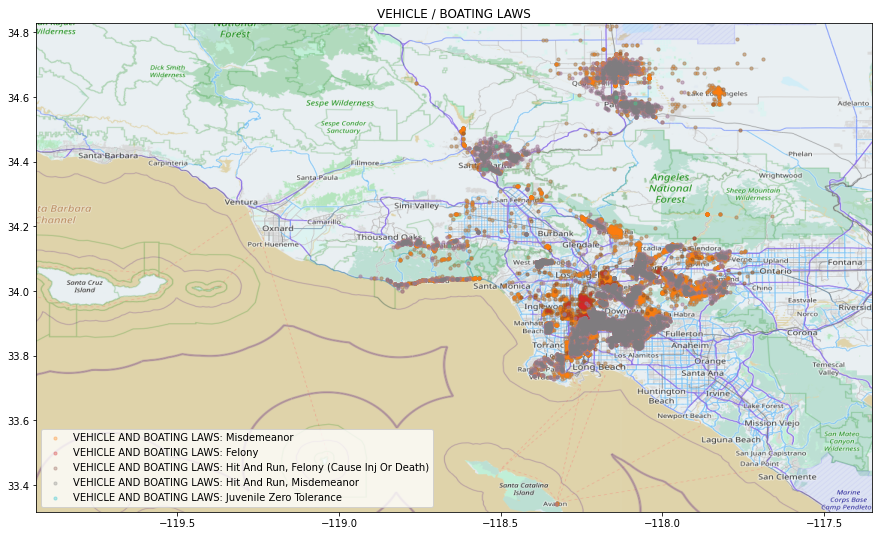

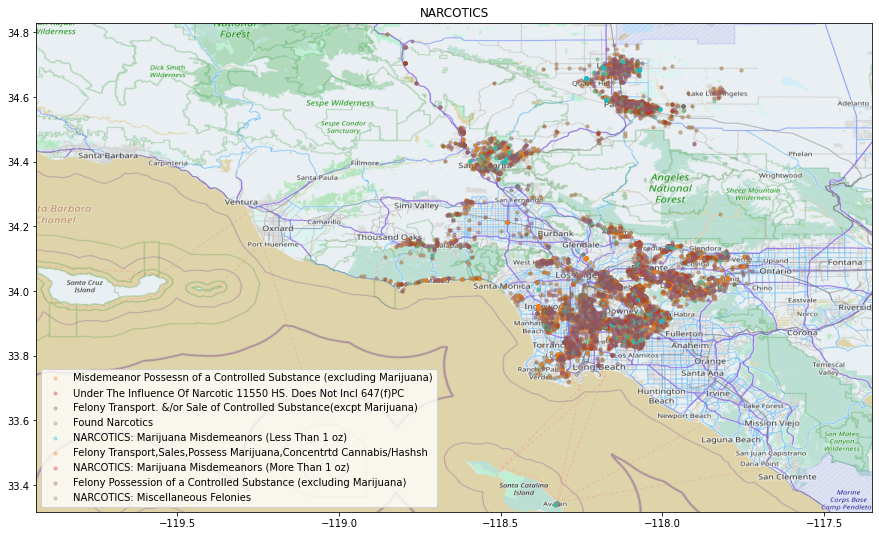

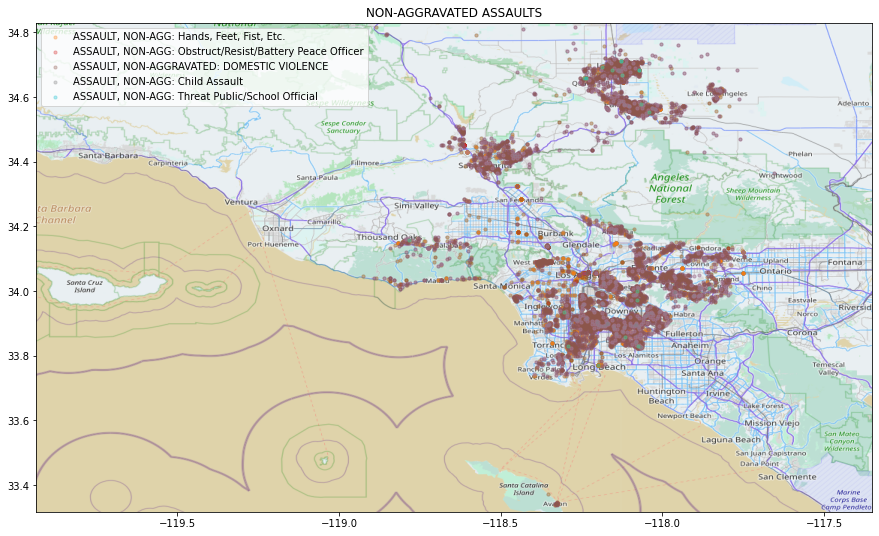

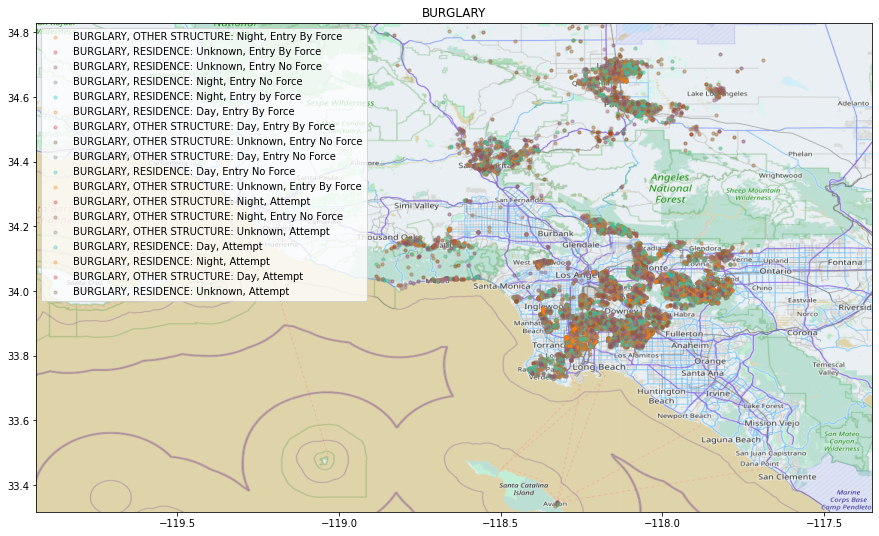

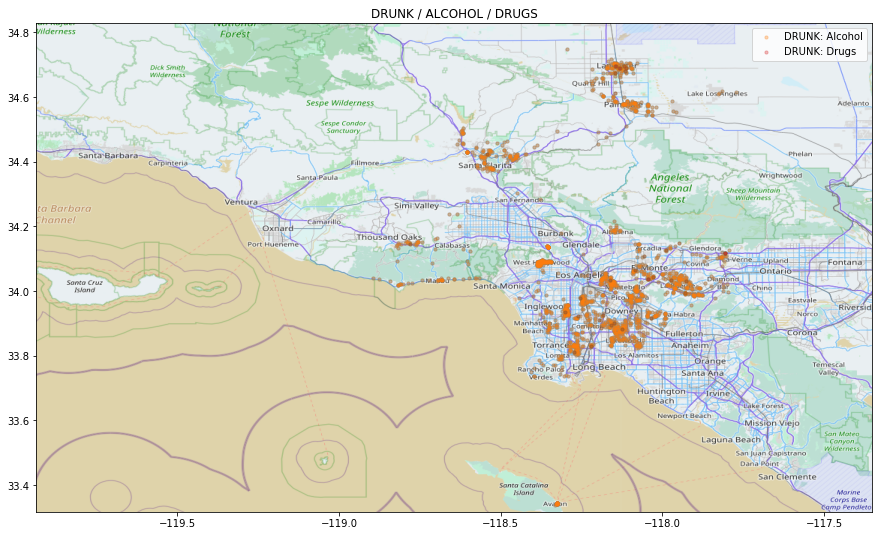

In [ ]:
for topic in category_list:
  fig, ax = plt.subplots(figsize = (16,9))
  df_col = df[df["CATEGORY"] == topic]
  detailed_vals = df_col["STAT_DESC"].unique()
  for val in detailed_vals:
    df_stat = df_col[df_col["STAT_DESC"] == val]
    df_long = df_stat["LONGITUDE"]
    df_lat = df_stat["LATITUDE"]
    ax.scatter(df_long, df_lat, zorder=1, alpha= 0.3, s=10)
    plot = ax.scatter(df_long, df_lat, zorder=1, alpha= 0.3, s=10)
    plot.set_label(val)

  
  min_lat = 33.317
  max_lat = 34.830
  min_long = -119.936
  max_long = -117.352
  BBox = (min_long, max_long,      
          min_lat, max_lat)
  ax.set_xlim(min_long, max_long)
  ax.set_ylim(min_lat, max_lat)
  ax.set_title(topic)

  ax.legend()

  ax.imshow(la_map, zorder=0, extent = BBox, aspect='equal')


 # Creation of Dataset

 Need the following information for specific groups of crimes:
 - index
 - bin
 - date

Task: create a method that takes in a specific dataset with `LONGITUDE`, `LATITUDE`, `DATE` rows and consolidate that information into table that fits above data.

In [ ]:
import math
# method to convert longitude and latitude coordinates into bin position
# https://gis.stackexchange.com/questions/2951/algorithm-for-offsetting-a-latitude-longitude-by-some-amount-of-meters

# 111,111 meters (111.111 km) in the y direction is 1 degree (of latitude) and 111,111 * cos(latitude) meters in the x direction is 1 degree (of longitude).

# redefine necessary constants
min_lat = 33.317
max_lat = 34.830
min_long = -119.936
max_long = -117.352

# 111,111 m/deg * deg * bin/150m
num_lat_bins = int((max_lat - min_lat) * 111111/150)
num_long_bins = int((max_long - min_long) * math.cos(math.radians(max_lat)) * 111111/150)
print(num_lat_bins)
print(num_long_bins)
def get_bin(long, lat):
  lat_coord = int((float(lat) - min_lat) * 111111/150)
  long_coord = int((float(long) - min_long) * math.cos(math.radians(float(lat))) * 111111/150)
  return lat_coord * num_long_bins + long_coord

print(get_bin(-118, 34))



1120
1571
794543


In [ ]:
from datetime import date

def create_dataset(df):
  miss_counter = 0
  data = []
  counter = 0
  for index, row in df.iterrows():
    item = []

    long = row["LONGITUDE"]
    lat = row["LATITUDE"]

    if(pd.isna(float(long)) or pd.isna(float(lat))):
      miss_counter += 1
      continue

    bin = get_bin(long, lat)
    # bin
    item.append(bin)

    incident_date = row["INCIDENT_DATE"]
    incident_mdy = incident_date.split("/")
    try:
      incident_date_py = date(int(incident_mdy[2][0:4]), int(incident_mdy[0]), int(incident_mdy[1]))
    except:
      miss_counter += 1
      continue

    # OCCURED
    item.append(incident_date_py.strftime("%m/%d/%y"))

    reported_date = row["INCIDENT_REPORTED_DATE"]
    reported_mdy = reported_date.split("/")
    try:
      reported_date_py = date(int(reported_mdy[2][0:4]), int(reported_mdy[0]), int(reported_mdy[1]))
    except:
      miss_counter += 1
      continue

    # LAG
    item.append((reported_date_py - incident_date_py).days)
    # item.append(0)

    data.append(item)

    counter += 1

  df_new = pd.DataFrame(data, columns=["bin", "OCCURRED", "LAG"])
  print("miss counter: " + str(miss_counter))
  return df_new

In [ ]:
from google.colab import files

df_narcs = df[df["CATEGORY"] == "NARCOTICS"]
print(df_narcs.shape)

df_narcs_pp = create_dataset(df_narcs)
print(df_narcs_pp.shape)

df_narcs_pp_unique_bins = pd.Series(df_narcs_pp["bin"].unique())

for index in df_narcs_pp.index:
  bin = df_narcs_pp.loc[index, "bin"]
  df_narcs_pp.loc[index, "bin"] = (df_narcs_pp_unique_bins[df_narcs_pp_unique_bins == bin].index[0])

df_narcs_pp = df_narcs_pp.sort_values(by=['OCCURRED'], key=pd.to_datetime)
df_narcs_pp.to_csv('test1.csv')
df_narcs_pp_unique_bins.to_csv('dict.csv')
files.download('test1.csv')
files.download('dict.csv')


(32229, 19)
miss counter: 1666
(30563, 3)


KeyboardInterrupt: ignored

In [ ]:
#df_narcs_pp["bin"].value_counts().nlargest(10).plot(kind='barh')

print(df_narcs_pp["OCCURRED"].min())

01/01/17
